In [48]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"blue", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}
import gc
gc.enable()

/eos/home-j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json


## 20230321 ##
# Description of the run #

* This run is a *temperature profile* run. It has 4 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

The first thing to do is to get the objective temperature and humidity thta the climatic chamber was trying to follow and out of that obtain the initial and final times of each of the plateaus. *This task has been performed prior to teh start of this study*

In [49]:
date = "20230321"
peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)

Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]


Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4'], dtype='object')
The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


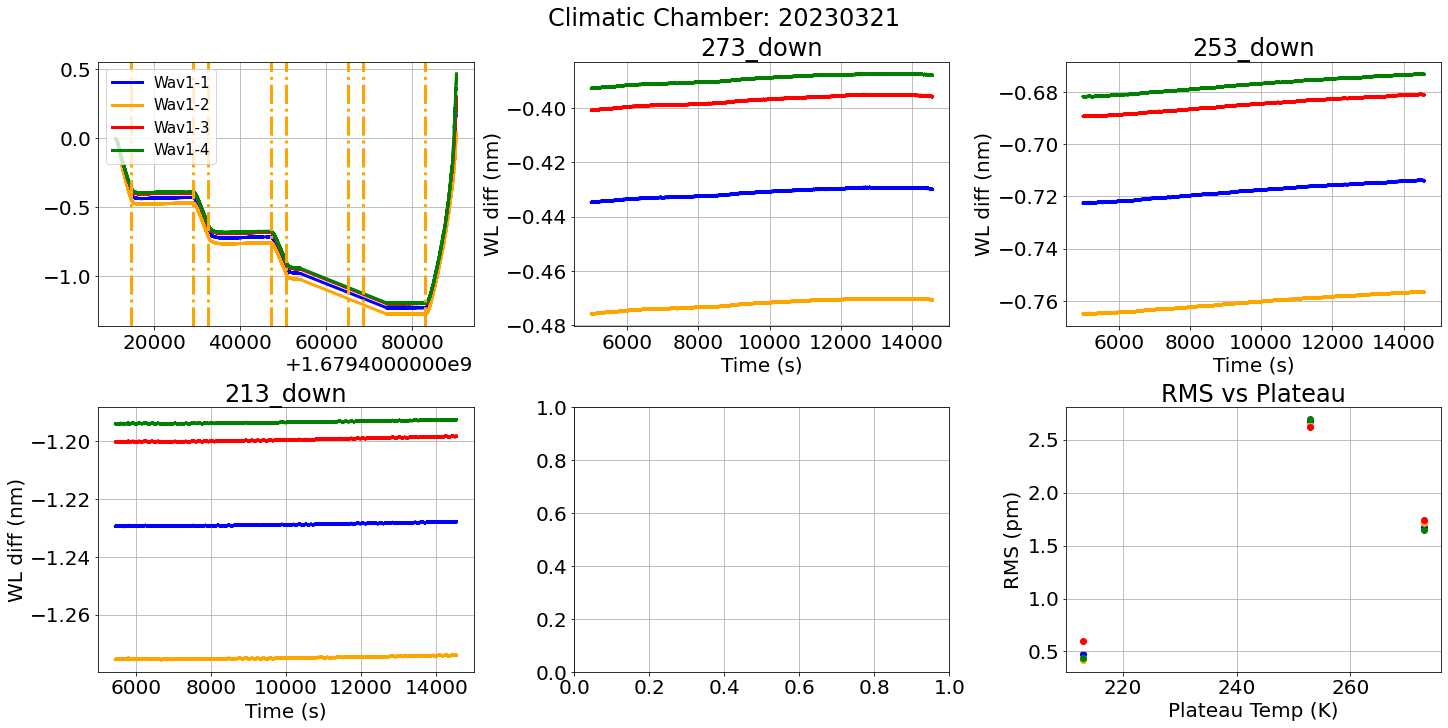

In [50]:
def plot_fbg_profile(date, peaks):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the fbg peaks
    print(peaks.columns)
    for sens in peaks.columns:
        if sens == "Timestamp":
            continue
        axes[0].plot(peaks["Timestamp"], 1e9*(peaks[sens] - peaks[sens][0]), color=colors[sens], label=sens)
    cnt = 1
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        if plateau == "233_down":
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
            continue
        else:
            pcut = peaks.loc[(peaks["Timestamp"]>t0+5000) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in pcut.columns:
            if sens == "Timestamp":
                continue
            axes[cnt].plot(pcut["Timestamp"]-t0, 1e9*(pcut[sens]-peaks[sens][0]), color=colors[sens])
            axes[cnt].set_title(plateau)
            axes[cnt].set_xlabel("Time (s)")
            axes[cnt].set_ylabel("WL diff (nm)")
            axes[5].scatter(int(plateau.split("_")[0]),
                           np.std(1e12*(pcut[sens]-peaks[sens][0])),
                           color=colors[sens])
            axes[5].set_title("RMS vs Plateau")
            axes[5].set_xlabel("Plateau Temp (K)")
            axes[5].set_ylabel("RMS (pm)")
        cnt += 1
    axes[0].legend(loc="upper left", fontsize=15)
    fig.show()
    del fig
    del axes
plot_fbg_profile(date, peaks)

In [51]:
gc.collect()

19365

Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4'], dtype='object')
The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


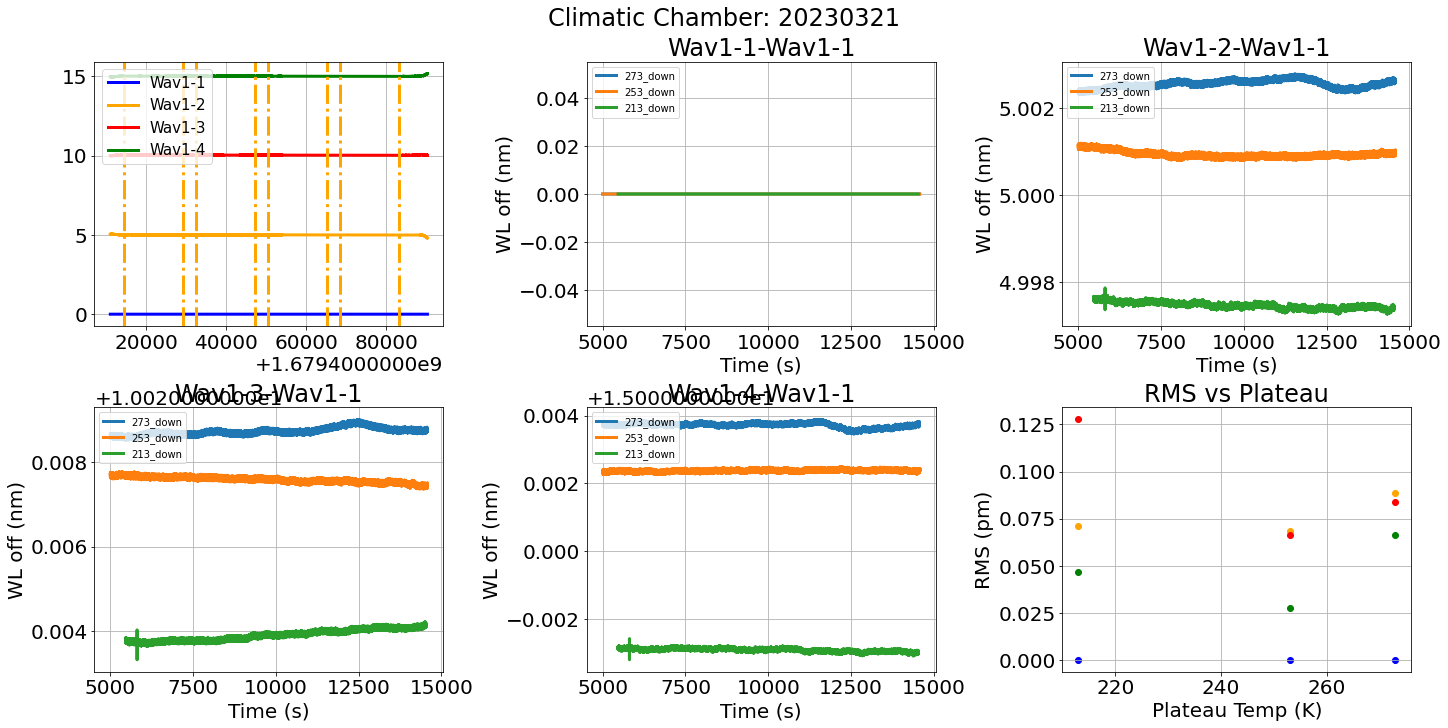

In [52]:
def plot_fbg_offsets(date, peaks):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the fbg peaks
    print(peaks.columns)
    ref = "Wav1-1"
    for sens in peaks.columns:
        if sens == "Timestamp":
            continue
        axes[0].plot(peaks["Timestamp"], 1e9*(peaks[sens] - peaks[ref]),
                     color=colors[sens], label=sens)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        if plateau == "233_down":
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
            continue
        else:
            pcut = peaks.loc[(peaks["Timestamp"]>t0+5000) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        cnt = 1
        for sens in pcut.columns:
            if sens == "Timestamp":
                continue
            axes[cnt].plot(pcut["Timestamp"]-t0, 1e9*(pcut[sens]-pcut[ref]), label=plateau)
            axes[cnt].set_title(sens+"-"+ref)
            axes[cnt].set_xlabel("Time (s)")
            axes[cnt].set_ylabel("WL off (nm)")
            axes[cnt].legend(fontsize=10, loc="upper left")
            axes[5].scatter(int(plateau.split("_")[0]),
                           np.std(1e12*(pcut[sens]-pcut[ref])),
                           color=colors[sens]
                           )
            axes[5].set_title("RMS vs Plateau")
            axes[5].set_xlabel("Plateau Temp (K)")
            axes[5].set_ylabel("RMS (pm)")
            cnt += 1
    axes[0].legend(loc="upper left", fontsize=15)
    fig.show()
    del fig
    del axes
plot_fbg_offsets(date, peaks)

In [53]:
gc.collect()

22565

## 20230322 ##
# Description of the run #

* This run is a *temperature profile* run. It has 4 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

The first thing to do is to get the objective temperature and humidity thta the climatic chamber was trying to follow and out of that obtain the initial and final times of each of the plateaus. *This task has been performed prior to teh start of this study*

In [7]:
date = "20230322"
peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)

Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [01:47<00:00,  5.37s/it]


Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4'], dtype='object')
The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


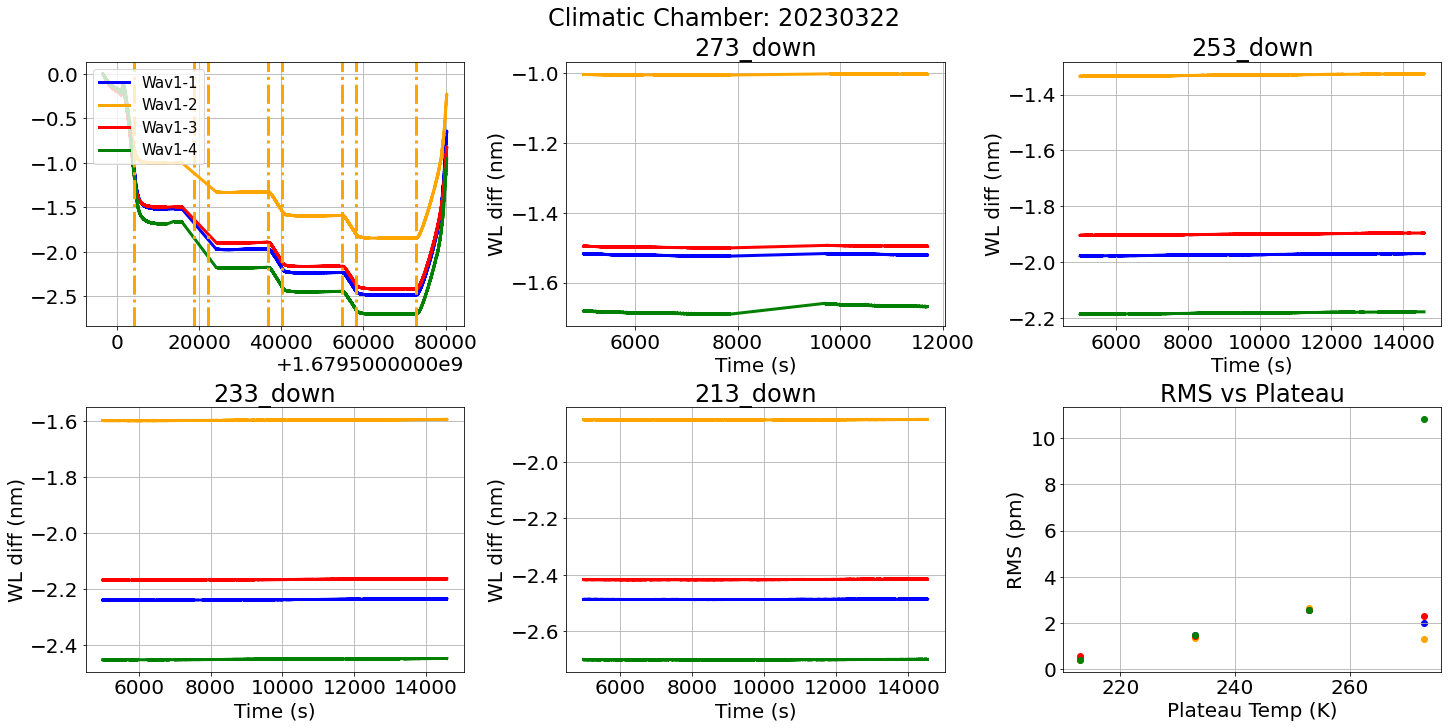

In [8]:
def plot_fbg_profile(date, peaks):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the fbg peaks
    print(peaks.columns)
    for sens in peaks.columns:
        if sens == "Timestamp":
            continue
        axes[0].plot(peaks["Timestamp"], 1e9*(peaks[sens] - peaks[sens][0]), color=colors[sens], label=sens)
    cnt = 1
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        if plateau == "243_down":
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        else:
            pcut = peaks.loc[(peaks["Timestamp"]>t0+5000) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in pcut.columns:
            if sens == "Timestamp":
                continue
            axes[cnt].plot(pcut["Timestamp"]-t0, 1e9*(pcut[sens]-peaks[sens][0]), color=colors[sens])
            axes[cnt].set_title(plateau)
            axes[cnt].set_xlabel("Time (s)")
            axes[cnt].set_ylabel("WL diff (nm)")
            axes[5].scatter(int(plateau.split("_")[0]),
                           np.std(1e12*(pcut[sens]-peaks[sens][0])),
                           color=colors[sens])
            axes[5].set_title("RMS vs Plateau")
            axes[5].set_xlabel("Plateau Temp (K)")
            axes[5].set_ylabel("RMS (pm)")
        cnt += 1
    axes[0].legend(loc="upper left", fontsize=15)
    fig.show()
    del fig
    del axes
plot_fbg_profile(date, peaks)

In [9]:
gc.collect()

20286

Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4'], dtype='object')
The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


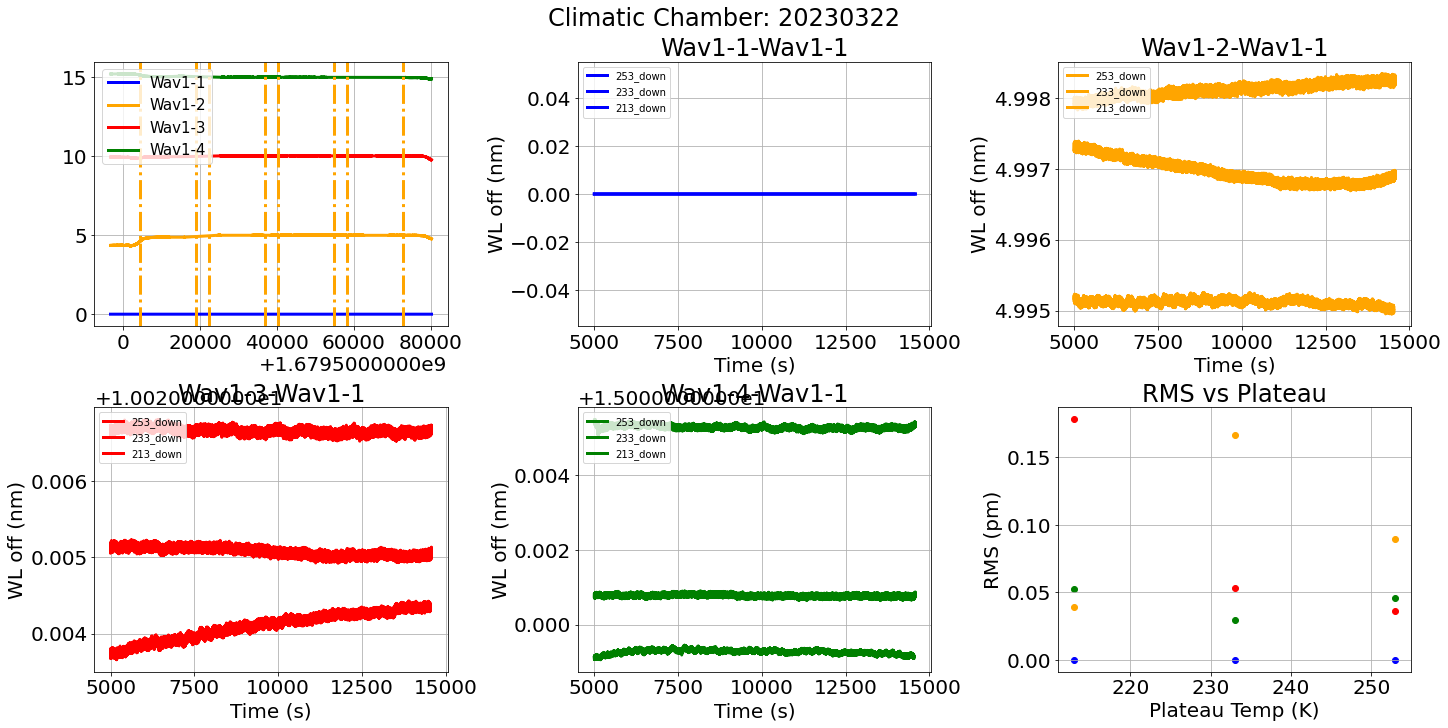

In [10]:
def plot_fbg_offsets(date, peaks):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the fbg peaks
    print(peaks.columns)
    ref = "Wav1-1"
    for sens in peaks.columns:
        if sens == "Timestamp":
            continue
        axes[0].plot(peaks["Timestamp"], 1e9*(peaks[sens] - peaks[ref]),
                     color=colors[sens], label=sens)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        if plateau == "273_down":
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
            continue
        else:
            pcut = peaks.loc[(peaks["Timestamp"]>t0+5000) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        cnt = 1
        for sens in pcut.columns:
            if sens == "Timestamp":
                continue
            axes[cnt].plot(pcut["Timestamp"]-t0, 1e9*(pcut[sens]-pcut[ref]), color=colors[sens], label=plateau)
            axes[cnt].set_title(sens+"-"+ref)
            axes[cnt].set_xlabel("Time (s)")
            axes[cnt].set_ylabel("WL off (nm)")
            axes[cnt].legend(fontsize=10, loc="upper left")
            axes[5].scatter(int(plateau.split("_")[0]),
                           np.std(1e12*(pcut[sens]-pcut[ref])),
                           color=colors[sens]
                           )
            axes[5].set_title("RMS vs Plateau")
            axes[5].set_xlabel("Plateau Temp (K)")
            axes[5].set_ylabel("RMS (pm)")
            cnt += 1
    axes[0].legend(loc="upper left", fontsize=15)
    fig.show()
    del fig
    del axes
plot_fbg_offsets(date, peaks)

In [11]:
gc.collect()

22207

## 20230329 ##
# Description of the run #

* This run is a *temperature profile* run. It has 4 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

The first thing to do is to get the objective temperature and humidity thta the climatic chamber was trying to follow and out of that obtain the initial and final times of each of the plateaus. *This task has been performed prior to teh start of this study*

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:50<00:00,  2.82s/it]


Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4', 'Wav2-1', 'Wav2-2',
       'Wav2-3', 'Wav2-4'],
      dtype='object')
The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


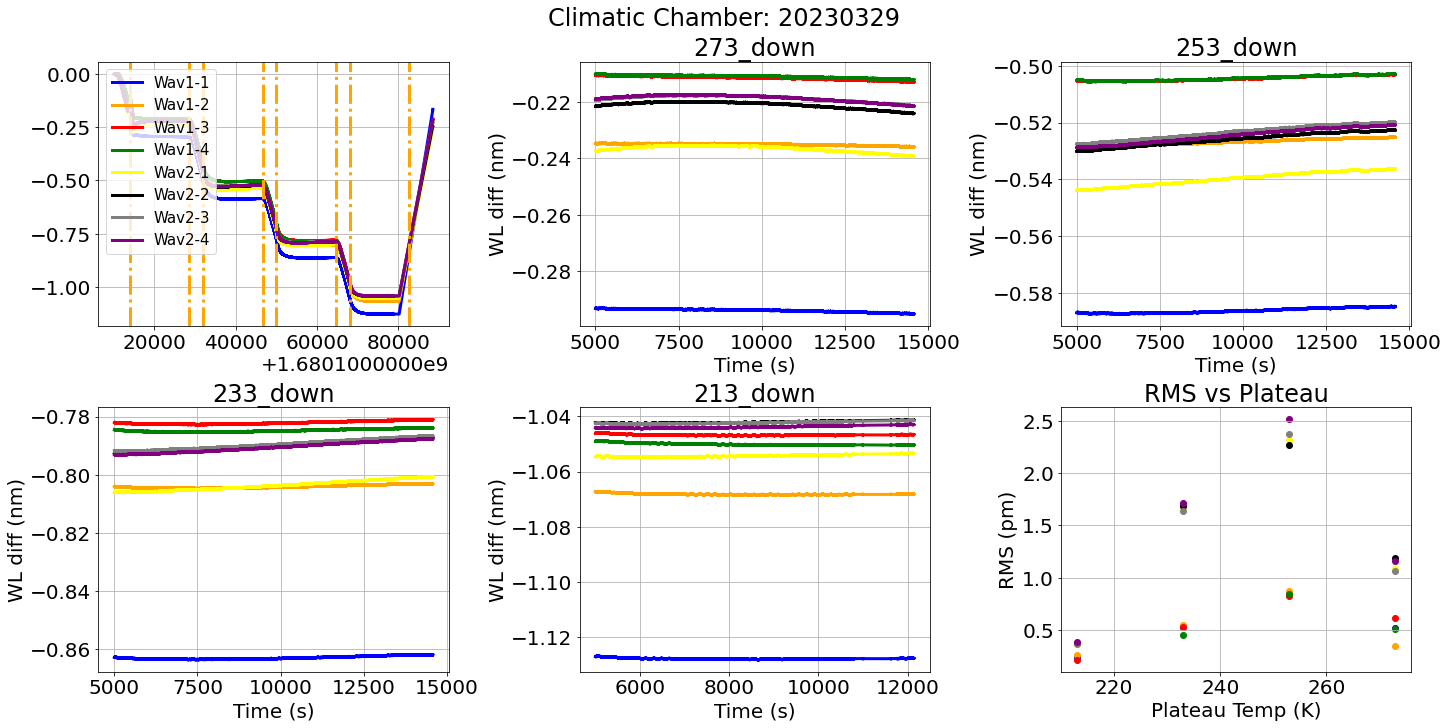

In [12]:
date = "20230329"
peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
plot_fbg_profile(date, peaks)

In [13]:
gc.collect()

23638

Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4', 'Wav2-1', 'Wav2-2',
       'Wav2-3', 'Wav2-4'],
      dtype='object')
The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


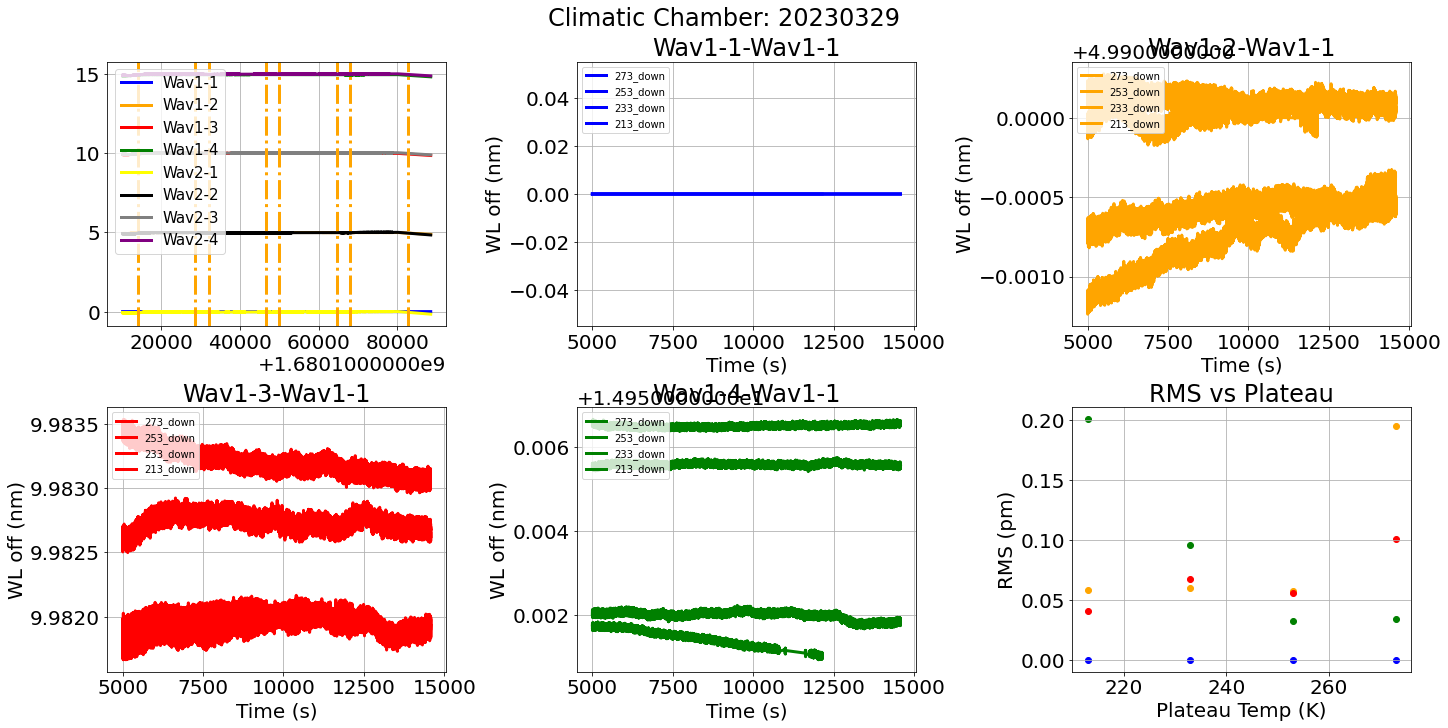

In [14]:
def plot_fbg_offsets(date, peaks):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the fbg peaks
    print(peaks.columns)
    ref = "Wav1-1"
    for sens in peaks.columns:
        if sens == "Timestamp":
            continue
        axes[0].plot(peaks["Timestamp"], 1e9*(peaks[sens] - peaks[ref]),
                     color=colors[sens], label=sens)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        if plateau == "263_down":
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
            continue
        else:
            pcut = peaks.loc[(peaks["Timestamp"]>t0+5000) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        cnt = 1
        for sens in pcut.columns:
            if sens == "Timestamp" or sens[3]=="2":
                continue
            axes[cnt].plot(pcut["Timestamp"]-t0, 1e9*(pcut[sens]-pcut[ref]), color=colors[sens], label=plateau)
            axes[cnt].set_title(sens+"-"+ref)
            axes[cnt].set_xlabel("Time (s)")
            axes[cnt].set_ylabel("WL off (nm)")
            axes[cnt].legend(fontsize=10, loc="upper left")
            axes[5].scatter(int(plateau.split("_")[0]),
                           np.std(1e12*(pcut[sens]-pcut[ref])),
                           color=colors[sens]
                           )
            axes[5].set_title("RMS vs Plateau")
            axes[5].set_xlabel("Plateau Temp (K)")
            axes[5].set_ylabel("RMS (pm)")
            cnt += 1
    axes[0].legend(loc="upper left", fontsize=15)
    fig.show()
    del fig
    del axes
plot_fbg_offsets(date, peaks)

In [15]:
gc.collect()

25223

hadjhasldhals

Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:42<00:00,  2.49s/it]


Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4'], dtype='object')
The plateau at 20_up is 2 hours long
The plateau at 40_up is 2 hours long
The plateau at 60_up is 2 hours long
The plateau at 40_down is 2 hours long
The plateau at 20_down is 2 hours long
The plateau at 40_up2 is 2 hours long


IndexError: list index out of range

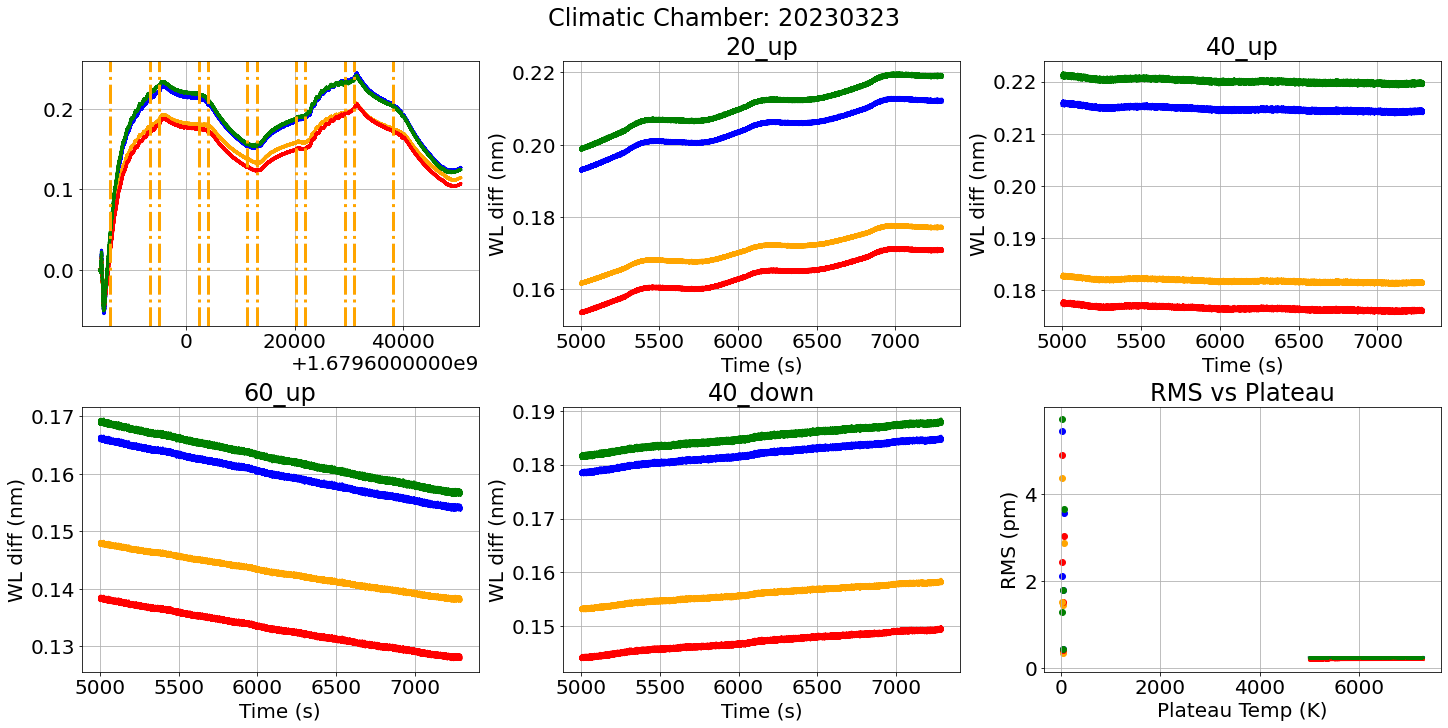

In [16]:
date = "20230323"
peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
plot_fbg_profile(date, peaks)

In [17]:
gc.collect()

10

Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4'], dtype='object')
The plateau at 20_up is 2 hours long
The plateau at 40_up is 2 hours long
The plateau at 60_up is 2 hours long
The plateau at 40_down is 2 hours long
The plateau at 20_down is 2 hours long
The plateau at 40_up2 is 2 hours long
The plateau at 60_up2 is 2 hours long


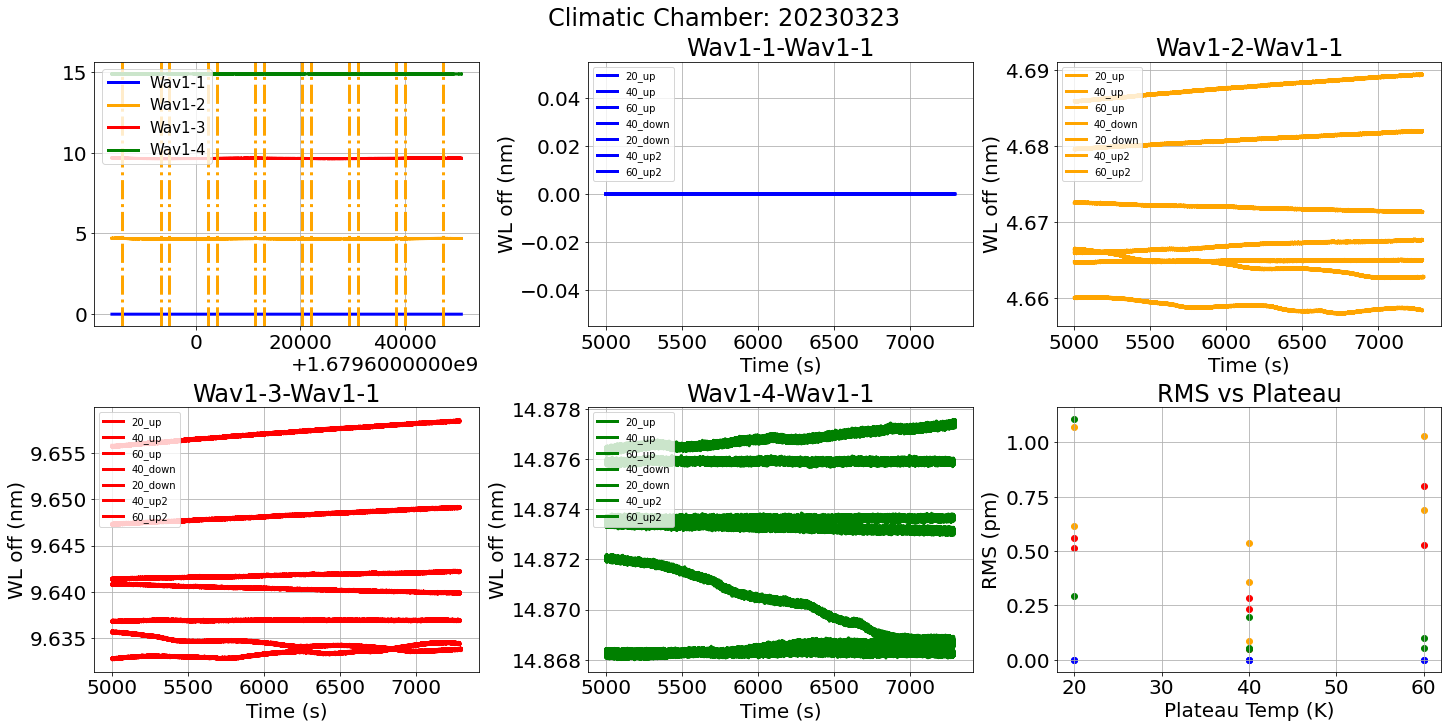

In [18]:
plot_fbg_offsets(date, peaks)

In [19]:
gc.collect()

35092

In [20]:
date ="20230328"
peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)

Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [01:11<00:00,  3.96s/it]


Index(['Timestamp', 'Wav1-1', 'Wav1-2', 'Wav1-3', 'Wav1-4', 'Wav2-1', 'Wav2-2',
       'Wav2-3', 'Wav2-4'],
      dtype='object')
The plateau at 20_up is 2 hours long
The plateau at 40_up is 2 hours long
The plateau at 60_up is 2 hours long
The plateau at 40_down is 2 hours long
The plateau at 20_down is 2 hours long
The plateau at 40_up2 is 2 hours long
The plateau at 60_up2 is 2 hours long


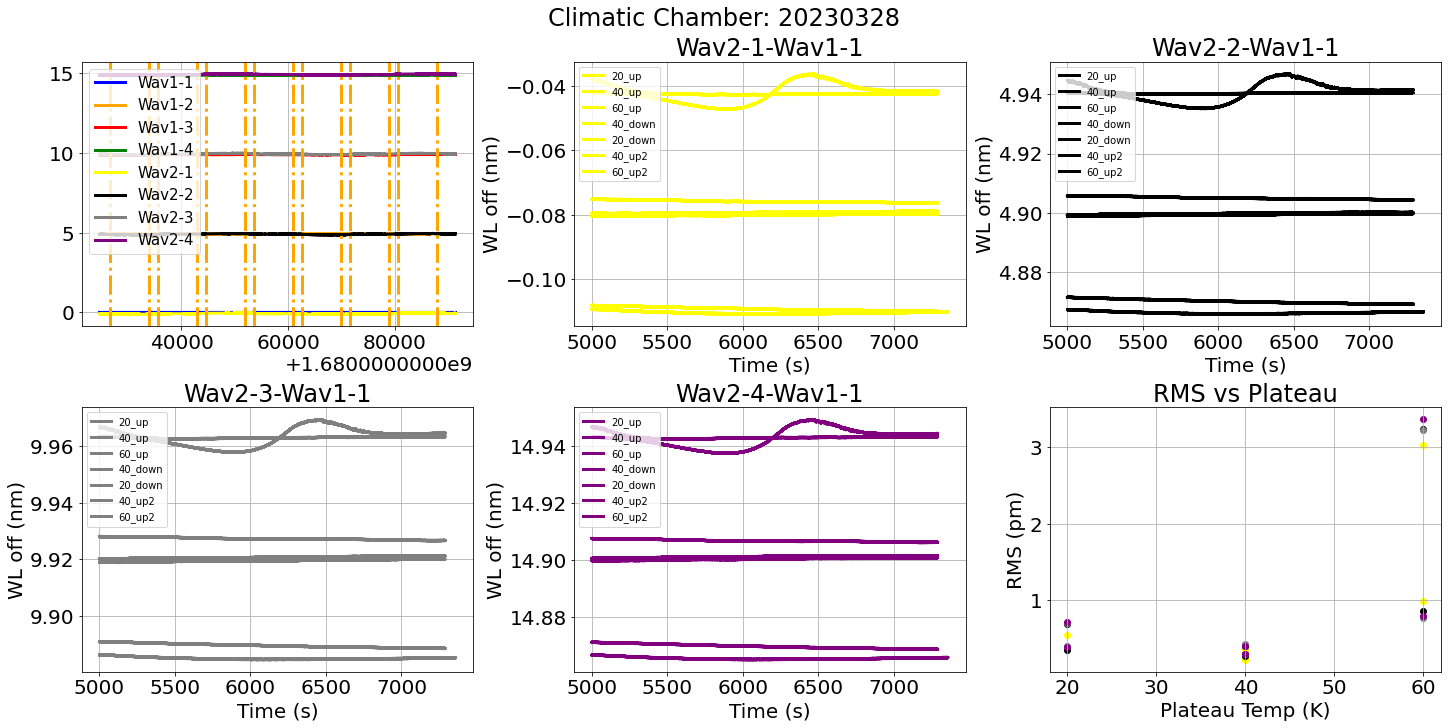

In [21]:
def plot_fbg_offsets(date, peaks):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the fbg peaks
    print(peaks.columns)
    ref = "Wav1-1"
    for sens in peaks.columns:
        if sens == "Timestamp":
            continue
        axes[0].plot(peaks["Timestamp"], 1e9*(peaks[sens] - peaks[ref]),
                     color=colors[sens], label=sens)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        if plateau == "263_down":
            pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
            continue
        else:
            pcut = peaks.loc[(peaks["Timestamp"]>t0+5000) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        cnt = 1
        for sens in pcut.columns:
            if sens == "Timestamp" or sens[3]=="1":
                continue
            axes[cnt].plot(pcut["Timestamp"]-t0, 1e9*(pcut[sens]-pcut[ref]), color=colors[sens], label=plateau)
            axes[cnt].set_title(sens+"-"+ref)
            axes[cnt].set_xlabel("Time (s)")
            axes[cnt].set_ylabel("WL off (nm)")
            axes[cnt].legend(fontsize=10, loc="upper left")
            axes[5].scatter(int(plateau.split("_")[0]),
                           np.std(1e12*(pcut[sens]-pcut[ref])),
                           color=colors[sens]
                           )
            axes[5].set_title("RMS vs Plateau")
            axes[5].set_xlabel("Plateau Temp (K)")
            axes[5].set_ylabel("RMS (pm)")
            cnt += 1
    axes[0].legend(loc="upper left", fontsize=15)
    fig.show()
    del fig
    del axes
plot_fbg_offsets(date, peaks)

In [22]:
gc.collect()

34474